# Feature Engineering with Logistic Regression

### Data Set - breast cancer tumor type

### Import libraries and loading the dataset

In [96]:
from sklearn import datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("white")

data = pd.read_csv('./data/data.csv') # Training set is already available
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Basic operations to understand the Dataset

In [97]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [98]:
print(f'Dimension of our data {data.shape} \n Data feature informations')
data.info()

Dimension of our data (569, 33) 
 Data feature informations
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se          

In [99]:
print(f' Total data {data.shape[0]} diagnosis.\n Categories: {data.diagnosis.unique()}\n Data value count: \n{data.diagnosis.value_counts()}')

 Total data 569 diagnosis.
 Categories: ['M' 'B']
 Data value count: 
B    357
M    212
Name: diagnosis, dtype: int64


### Data Quality check

In [100]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [101]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [102]:
data.var()

/var/folders/v_/l24v4nns5tddvgn23v7hj8mw0000gn/T/ipykernel_27787/445316826.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.var()


id                         1.563015e+16
radius_mean                1.241892e+01
texture_mean               1.849891e+01
perimeter_mean             5.904405e+02
area_mean                  1.238436e+05
smoothness_mean            1.977997e-04
compactness_mean           2.789187e-03
concavity_mean             6.355248e-03
concave points_mean        1.505661e-03
symmetry_mean              7.515428e-04
fractal_dimension_mean     4.984872e-05
radius_se                  7.690235e-02
texture_se                 3.043159e-01
perimeter_se               4.087896e+00
area_se                    2.069432e+03
smoothness_se              9.015114e-06
compactness_se             3.207029e-04
concavity_se               9.111982e-04
concave points_se          3.807242e-05
symmetry_se                6.833290e-05
fractal_dimension_se       7.001692e-06
radius_worst               2.336022e+01
texture_worst              3.777648e+01
perimeter_worst            1.129131e+03
area_worst                 3.241674e+05


In [103]:
#basic descriptive statistics
data.skew()

/var/folders/v_/l24v4nns5tddvgn23v7hj8mw0000gn/T/ipykernel_27787/1162981305.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.skew()


id                         6.473752
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1

### Observations

1. We have to predict the diagnosis column from the dataset.
2. We can remove the id and Unnamed: 32 columns because it doesn't contain any relevant information.
3. Here, we don't have a 0 null value, and all other features are in float64 except the diagnosis.
4. Since the majority of the components have variances that are close to zero, variable information is poor for analyzing the data.
5. Most of the features are positively skewed.

### Data Visualization

We will group the mean value features and plot the graph.

diagnosis
B    AxesSubplot(0.125,0.11;0.775x0.77)
M    AxesSubplot(0.125,0.11;0.775x0.77)
dtype: object

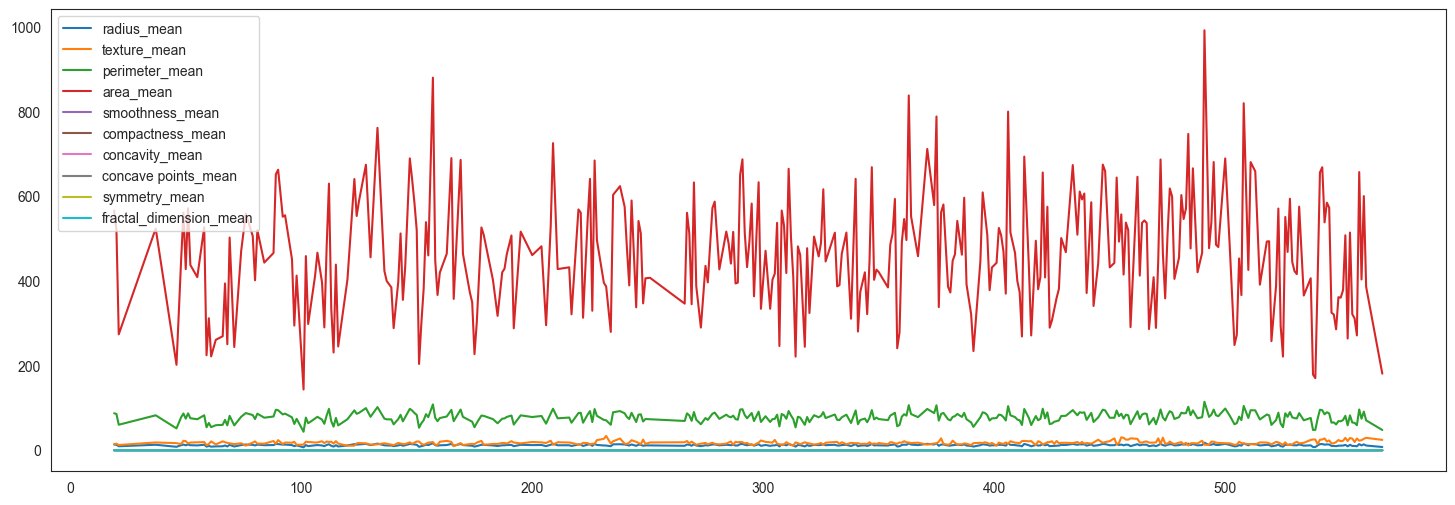

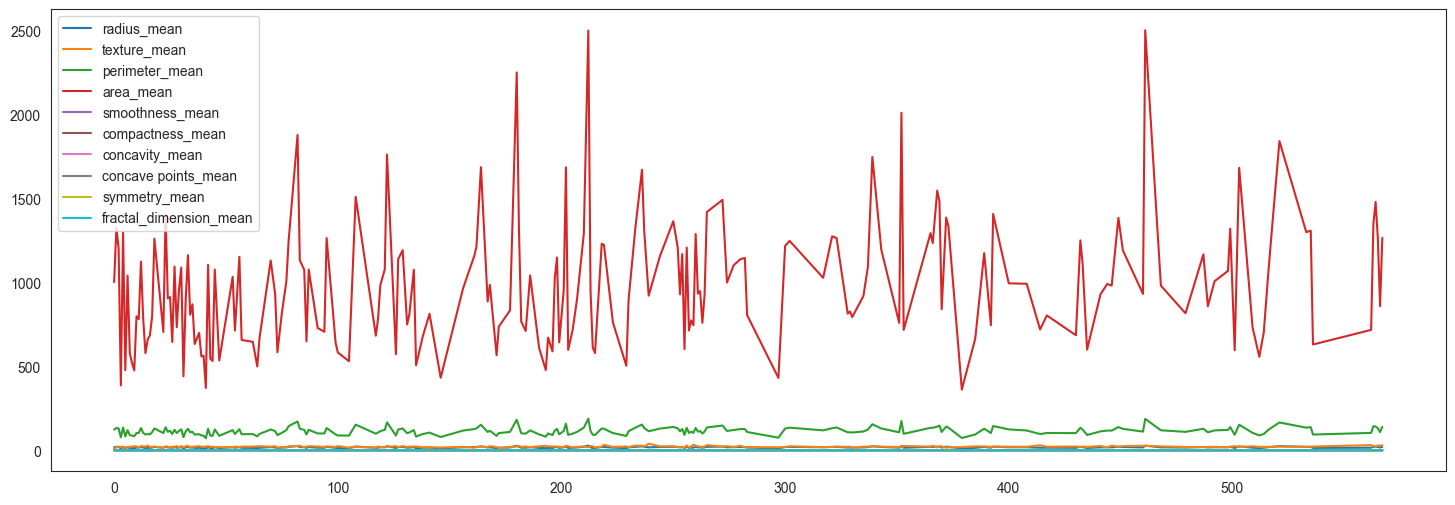

In [104]:
mean_col=[x for x in data.columns if 'mean' in x] + ['diagnosis']
data_grp=data[mean_col].groupby('diagnosis')
data_grp.plot(figsize=(18, 6), label=True)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,,,,,,,,,,
B,"AxesSubplot(0.125,0.712609;0.227941x0.167391)","AxesSubplot(0.398529,0.712609;0.227941x0.167391)","AxesSubplot(0.672059,0.712609;0.227941x0.167391)","AxesSubplot(0.125,0.511739;0.227941x0.167391)","AxesSubplot(0.398529,0.511739;0.227941x0.167391)","AxesSubplot(0.672059,0.511739;0.227941x0.167391)","AxesSubplot(0.125,0.31087;0.227941x0.167391)","AxesSubplot(0.398529,0.31087;0.227941x0.167391)","AxesSubplot(0.672059,0.31087;0.227941x0.167391)","AxesSubplot(0.125,0.11;0.227941x0.167391)"
M,"AxesSubplot(0.125,0.712609;0.227941x0.167391)","AxesSubplot(0.398529,0.712609;0.227941x0.167391)","AxesSubplot(0.672059,0.712609;0.227941x0.167391)","AxesSubplot(0.125,0.511739;0.227941x0.167391)","AxesSubplot(0.398529,0.511739;0.227941x0.167391)","AxesSubplot(0.672059,0.511739;0.227941x0.167391)","AxesSubplot(0.125,0.31087;0.227941x0.167391)","AxesSubplot(0.398529,0.31087;0.227941x0.167391)","AxesSubplot(0.672059,0.31087;0.227941x0.167391)","AxesSubplot(0.125,0.11;0.227941x0.167391)"


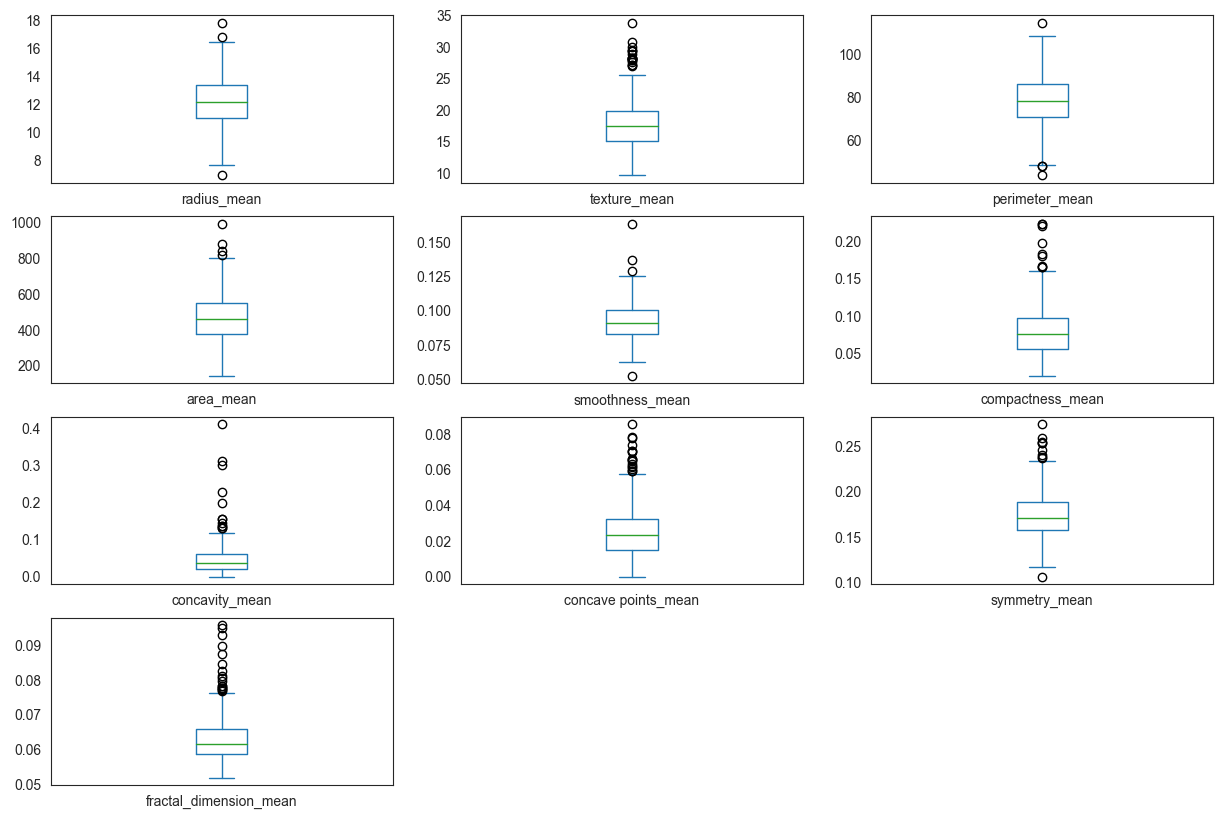

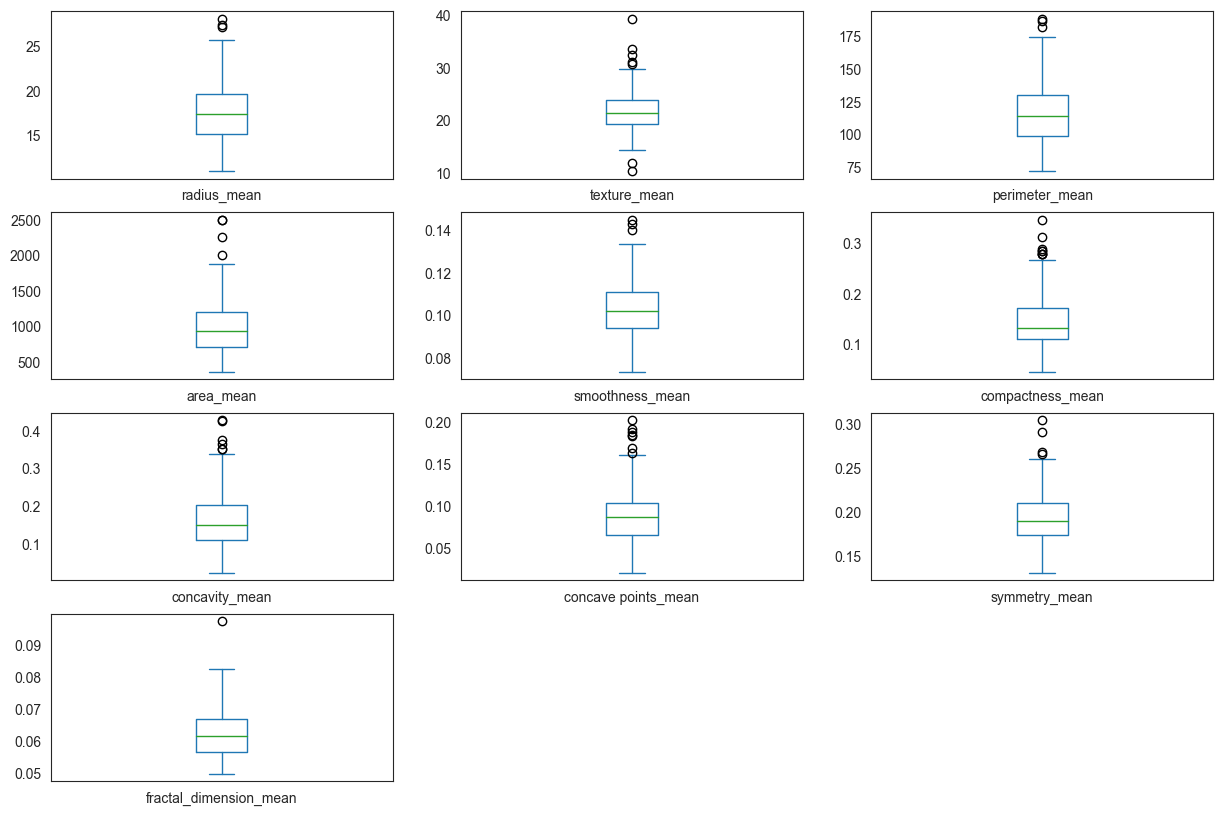

In [105]:
data_grp.plot(kind= 'box' , subplots=True, layout=(4,3), sharex=False, sharey=False,figsize=(15,10))

### Observations

1. We can observe that the characteristics of perimeter, radius, area, concavity, and compactness may be distributed exponentially. 
2. we can see that the symmetry, smoothness, and texture characteristics may have a Gaussian or nearly Gaussian distribution. This is intriguing because the input variables are typically assumed to have a Gaussian univariate distribution by many machine learning approaches.

In [106]:
# get the mean values from data
data_mean = data.iloc[:,1:11]

In [107]:
data_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   diagnosis            569 non-null    object 
 1   radius_mean          569 non-null    float64
 2   texture_mean         569 non-null    float64
 3   perimeter_mean       569 non-null    float64
 4   area_mean            569 non-null    float64
 5   smoothness_mean      569 non-null    float64
 6   compactness_mean     569 non-null    float64
 7   concavity_mean       569 non-null    float64
 8   concave points_mean  569 non-null    float64
 9   symmetry_mean        569 non-null    float64
dtypes: float64(9), object(1)
memory usage: 44.6+ KB


array([[<AxesSubplot: title={'center': 'radius_mean'}>,
        <AxesSubplot: title={'center': 'texture_mean'}>,
        <AxesSubplot: title={'center': 'perimeter_mean'}>],
       [<AxesSubplot: title={'center': 'area_mean'}>,
        <AxesSubplot: title={'center': 'smoothness_mean'}>,
        <AxesSubplot: title={'center': 'compactness_mean'}>],
       [<AxesSubplot: title={'center': 'concavity_mean'}>,
        <AxesSubplot: title={'center': 'concave points_mean'}>,
        <AxesSubplot: title={'center': 'symmetry_mean'}>]], dtype=object)

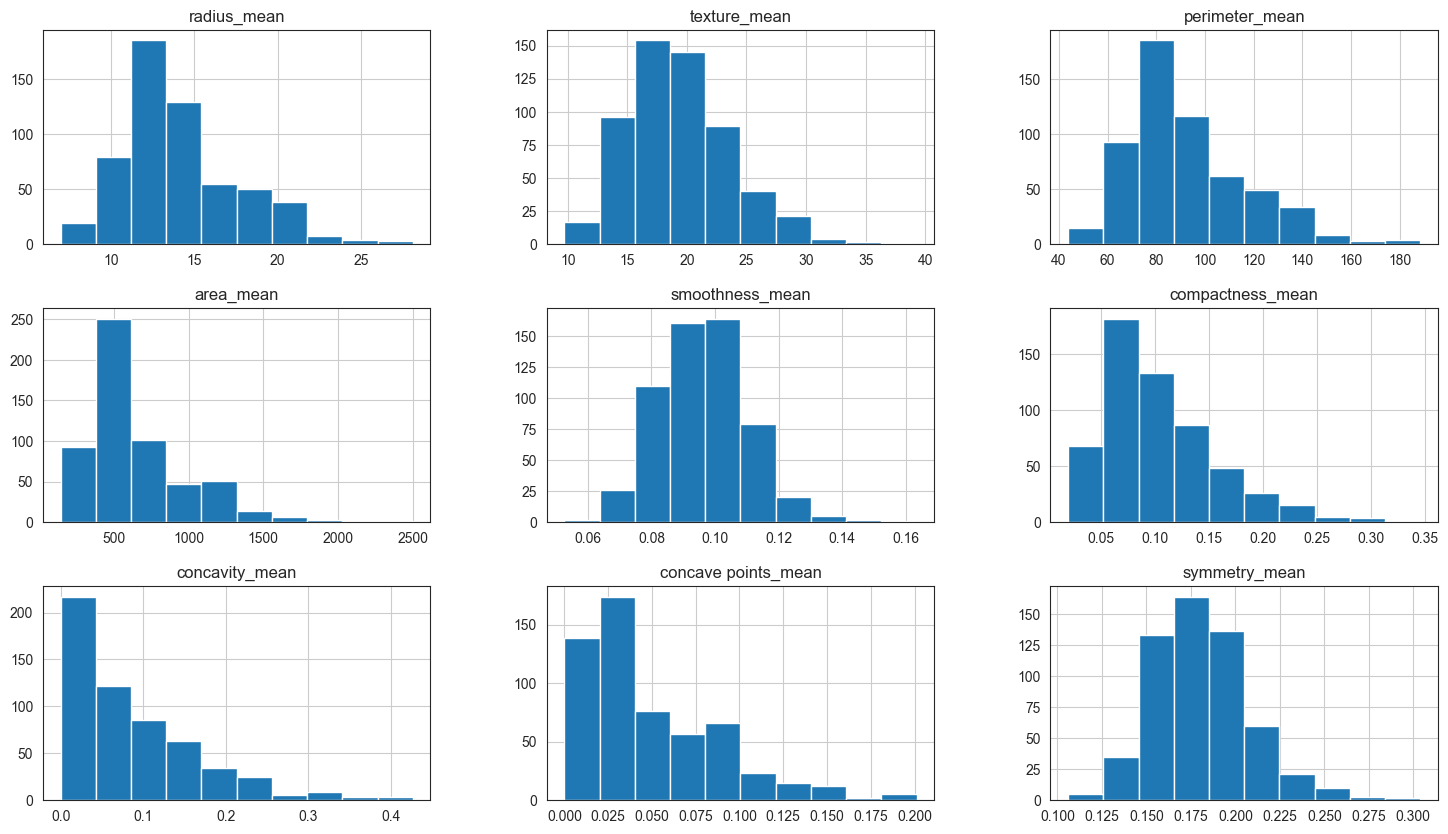

In [108]:
data_mean.hist(bins=10, figsize=(18,10))

### Observations:-

1. We can see that perhaps the attributes concavity, and concavity_point may have an exponential distribution.
2. We can also see that perhaps the texture, smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution.

array([[<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>],
       [<AxesSubplot: ylabel='Density'>, <AxesSubplot: ylabel='Density'>,
        <AxesSubplot: ylabel='Density'>]], dtype=object)

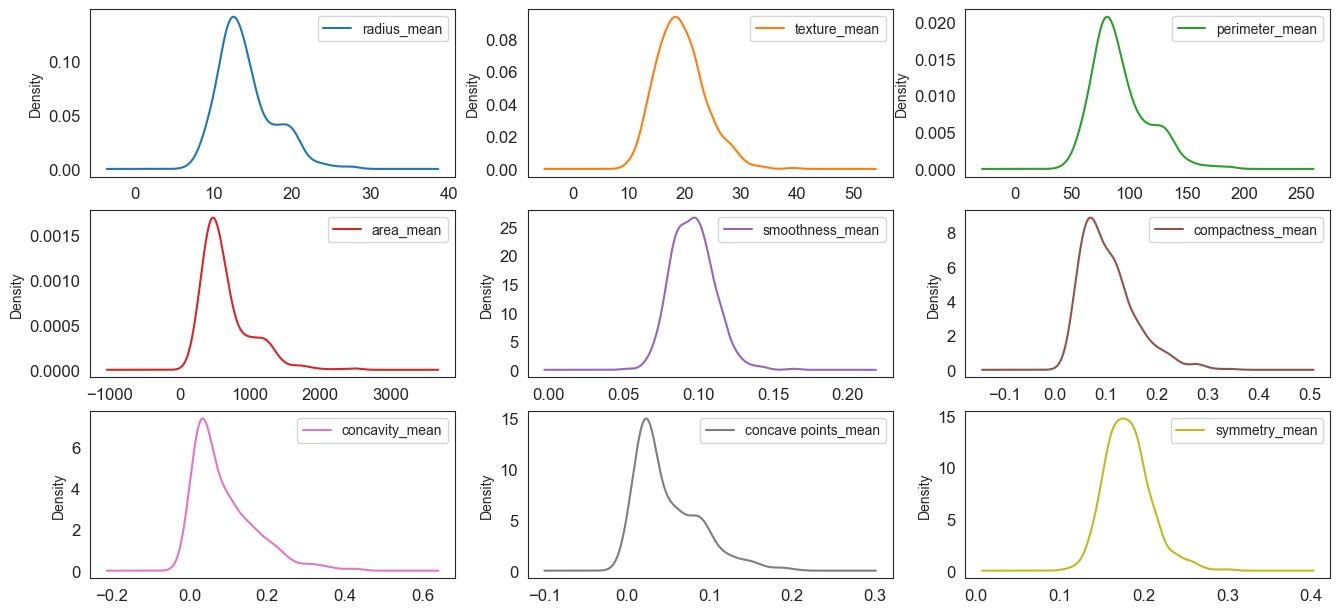

In [109]:
data_mean.plot(kind='density', subplots=True, sharex=False, sharey=False,layout=(4,3),fontsize=12, figsize=(16,10))

### Observations:-

1. We can see that perhaps the attributes perimeter, radius, area, concavity, compactness may have an exponential distribution.
2. We can also see that perhaps the texture, smooth and symmetry attributes may have a Gaussian or nearly Gaussian distribution.

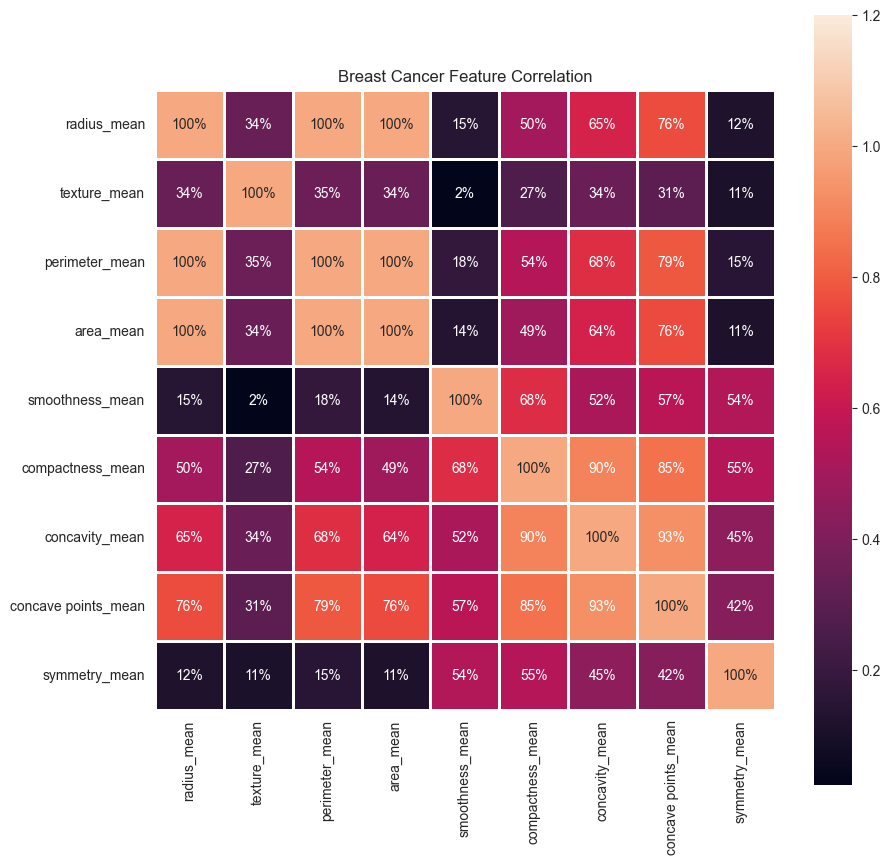

In [110]:
# below is the heatmap of correlation matrix which calculates the correlation between each pair of features.
plt.figure(figsize=(10,10))
sns.heatmap(data_mean.corr("spearman"), vmax=1.2, annot=True, square='square', fmt = '.0%', linewidths=2)
plt.title('Breast Cancer Feature Correlation')
plt.show()

We can see that the mean parameters have a strong positive correlation with values between 0 and 0.75.

1. The mean area of the tissue nucleus has a high positive association with the mean values of radius and parameter.

2. A few parameters have fairly positive correlations (r between 0.5 and 0.75), such as concavity and area, concavity and perimeter, etc. 

3. Similar to this, we observe a substantial negative association between fractal_dimension and the mean values of the radius, texture, and parameter.

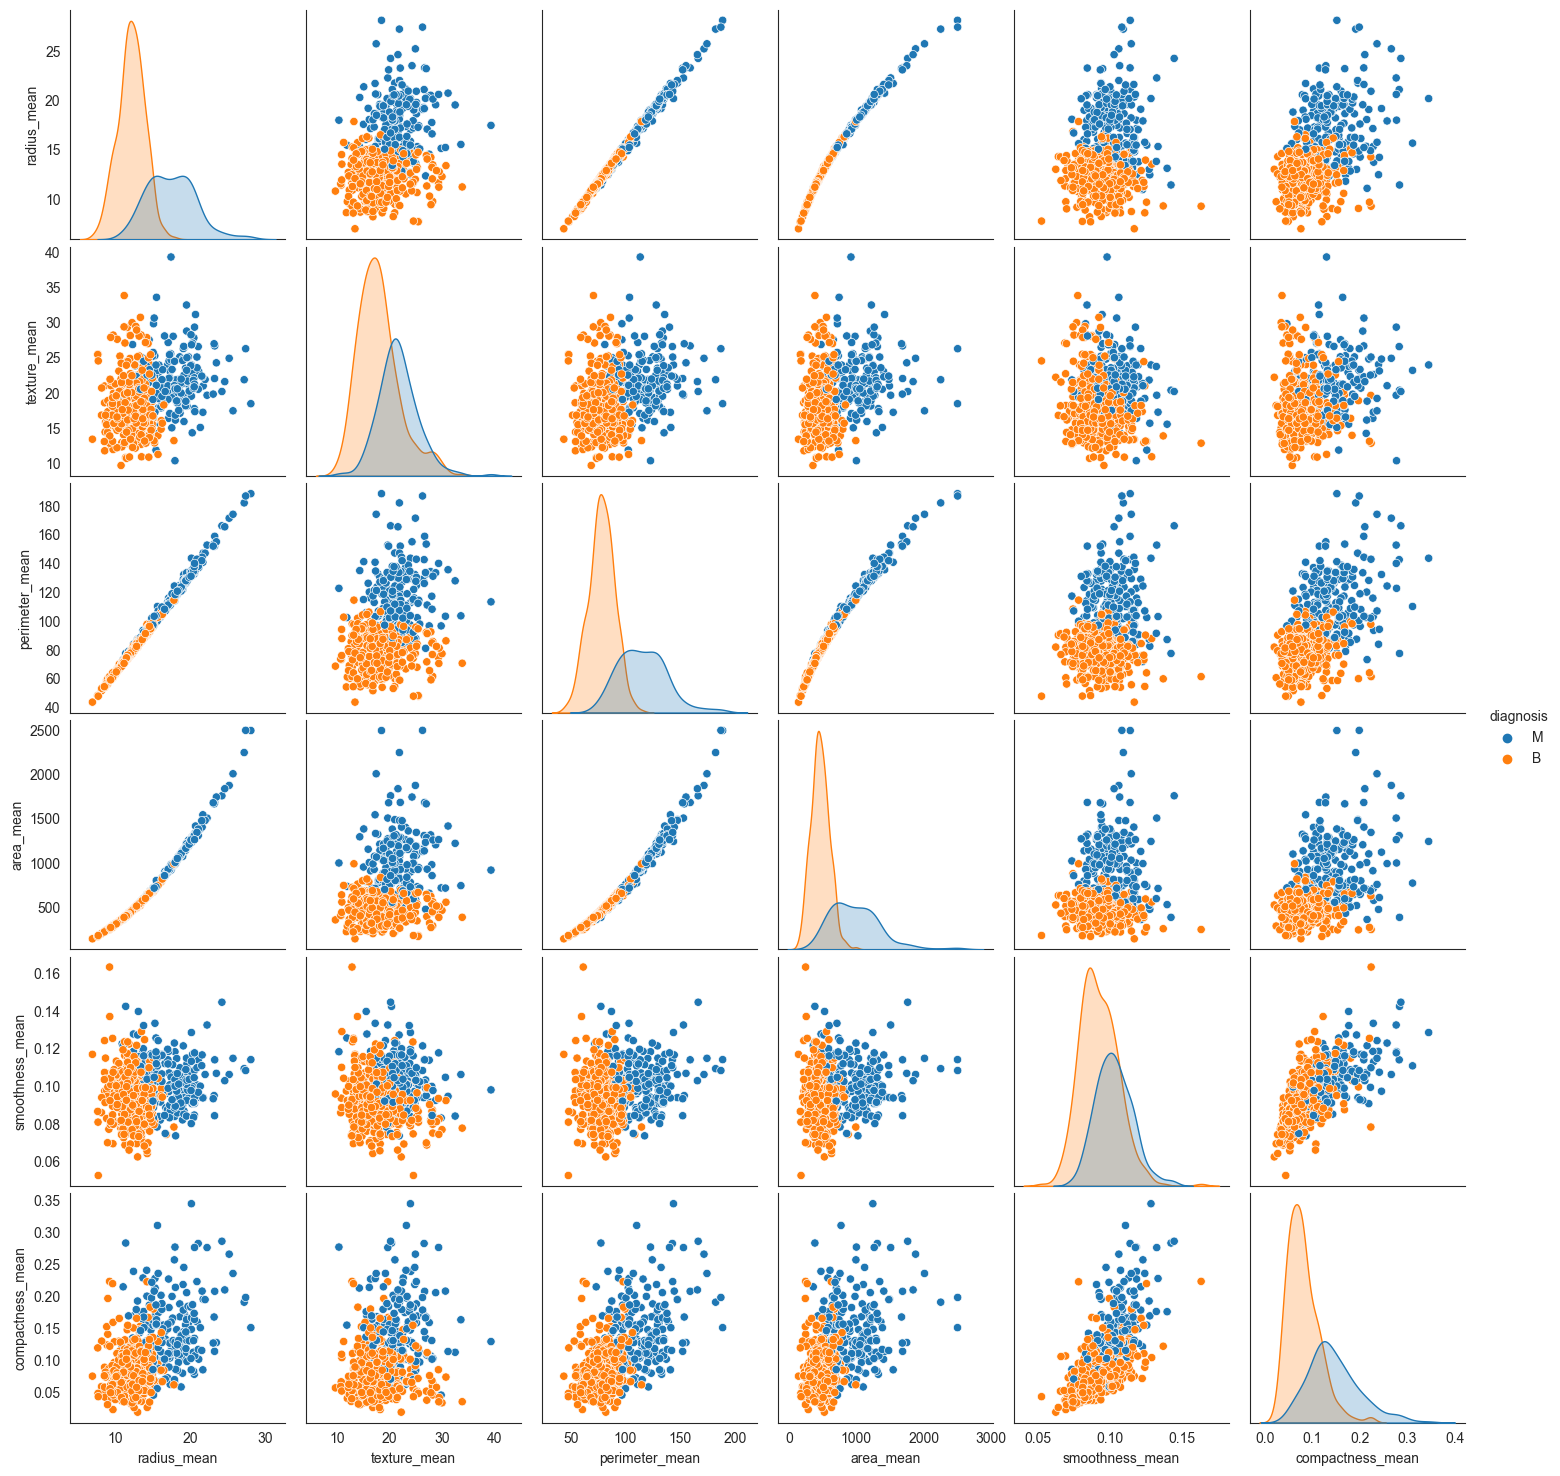

In [111]:

#Encoding the catagorial data values 
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
labelencoder_Y.fit_transform(data.iloc[:,1].values)
data.iloc[:,1]

#create pair plot 
#index 1 to 6
import seaborn as sns
sns.pairplot(data.iloc[:,1:8],hue='diagnosis')

### Observations:-

1. Cancer can be categorized using the average values of the cell's radius, perimeter, area, and compactness spots. These metric's larger values frequently exhibit a link with malignant tumors.

2. mean values of texture and smoothness do not show a particular preference for one diagnosis over the other.

### Feature Engineering

In [113]:
# Features "id" and "Unnamed: 32" are not useful 
data.drop('id',axis=1, inplace=True)
data.drop(data.columns[[-1]], axis = 1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [114]:
# label encoding
diag_map = {'M':1, 'B':0}
data['diagnosis'] = data['diagnosis'].map(diag_map)

After encoding the class labels(diagnosis) in an array y, the malignant tumors are now represented as class 1(i.e prescence of cancer cells) and the benign tumors are represented as class 0 (i.e no cancer cells detection), respectively

In [115]:
features_selection = ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean']

### Target Feature separation

In [117]:
x = data.drop('diagnosis',axis=1)
y = data.diagnosis

### Standarization

In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(x)
features

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

we use sklearn to scale and transform the data such that each attribute has a mean value of zero and a standard deviation of one.

### Spliting the data into train and test in 70:30 ratio

In [121]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=1)

## Prediction

In [122]:
# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics

lr =LogisticRegression(C=1.0, penalty='l2', solver='newton-cg')
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print(classification_report(y_test, y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

Accuracy: 0.9707602339181286
Precision: 0.953125
Recall: 0.9682539682539683
0.9899497487437185
0.9707602339181286


In [123]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,lr.predict(x_test))

TP = cm[0][0]
TN = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
print(cm)
print('Testing accurancy : ', (TP+TN)/(TP+TN+FN+FP))
print()

[[105   3]
 [  2  61]]
Testing accurancy :  0.9707602339181286



In [124]:
#print the prediction
pred = lr.predict(x_test)
print(pred)
print()
print(y_test)

[0 1 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1
 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0]

421    0
47     1
292    0
186    1
414    1
      ..
6      1
487    1
11     1
268    0
419    0
Name: diagnosis, Length: 171, dtype: int64


### Error Analysis Using ROC and AUC

Randomized Predictions: ROC AUC=0.500
Logistic Regression Classifier: ROC AUC=0.996


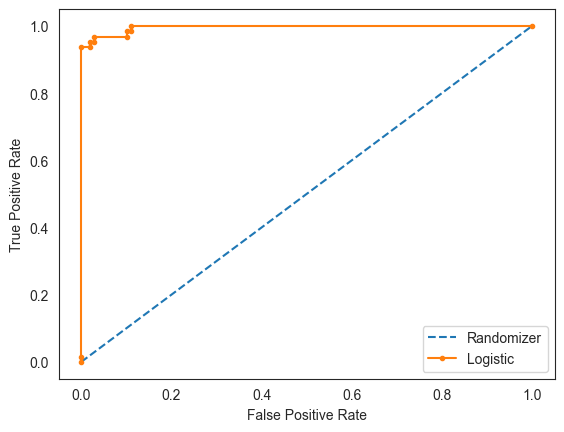

In [125]:

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = lr.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Randomized Predictions: ROC AUC=%.3f' % (ns_auc))
print('Logistic Regression Classifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Randomizer')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [126]:
pred_converted=[]

for i in range(len(pred)):
    if pred[i]==0:
        pred_converted.append('B')
    else :
        pred_converted.append('M')
        
y_test_converted=[]

y_test=np.array(y_test)

for i in range(len(y_test)):
    if y_test[i]==0:
        y_test_converted.append('B')
    else :
        y_test_converted.append('M')
        
print(pred_converted)
print(y_test_converted)

['B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B']
['B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M'

# Saving the Output into CSV file
column1 = Actual
column2 = predicted

In [127]:
op = pd.DataFrame(y_test_converted,pred_converted)

#save the Op dataframe into csv
op_file = op.to_csv('pred_output.csv')

op

,0
B,B
M,M
B,B
M,M
M,M
...,...
M,M
M,M
M,M
B,B
